# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Prepare a model that is invariant to the transformations and can recognize the varied images.

## Learning Objectives

At the end of the mini hackathon, you will be able to :

* Load and prepare images for the model using Pytorch
* Load and Finetune a pre-trained model for predicting the labels of the transformed images

## Dataset

The dataset is comprised of photos of buildings, forests, glaciers, mountains, sea, and streets provided as a subset of photos.

The dataset has been divided into folders for training, validation, and testing. The training folder includes around 14,000 images and the validation folder has around 3,000 images. Finally, the  testing folder includes around 10 images.

## Grading = 20 Marks

## Setup Steps

In [ ]:
! wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Image_Transformations.zip
! unzip -qq Image_Transformations.zip

In [ ]:
%ls

Image_Transformations/  Image_Transformations.zip  sample_data/


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform **preprocessing on images** and operations sequentially. 

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

## **Stage 1:** Data Preprocessing

### 1 Mark -> Load the training dataset

In [ ]:
loader = transforms.Compose([transforms.Resize((256,256)), 
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# YOUR CODE HERE for the DataLoader

batch_size = 10 

train_set = datasets.ImageFolder('Image_Transformations/training', transform = loader)
valid_set = datasets.ImageFolder('Image_Transformations/validation', transform = loader)

train_loader=torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader=torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=2)

# Check number of training and test images
dataset_sizes = {'Train': len(train_set), 'Validation': len(valid_set)}
print(f"The dataset Sizes: {dataset_sizes}")

num_classes = len(train_set.classes)
print(f"Number of classes available: {num_classes}")

The dataset Sizes: {'Train': 14034, 'Validation': 3000}
Number of classes available: 6


## **Stage 2:** Load and Finetune a pre-trained model

Load a pretrained model and finetune the appropriate layers



###  4 Marks -> Fine-tune the Model and declare the loss function and optimizer. 

[Hint for Finetuning Models](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)

Initialize the device to the available runtime type

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# YOUR CODE HERE for the loading and finetuning the Pre-trained model
# YOUR CODE HERE for declaring the loss function and optimizer   
basemodel = models.alexnet(pretrained=True)

basemodel

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Freeze all layers
for param in basemodel.parameters():
    param.requires_grad = False

# Parameters of the below newly constructed modules have "requires_grad=True" 
basemodel.classifier[6] = nn.Linear(4096,num_classes)

criterion = nn.CrossEntropyLoss()

# Optimize only the fully connected layer portion
optimizer = optim.SGD(basemodel.classifier.parameters(), lr=0.003, momentum=0.5)

model = basemodel.to(device)

# Print the summary of the model
from torchsummary import summary
summary(model, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 63, 63]          23,296
              ReLU-2           [-1, 64, 63, 63]               0
         MaxPool2d-3           [-1, 64, 31, 31]               0
            Conv2d-4          [-1, 192, 31, 31]         307,392
              ReLU-5          [-1, 192, 31, 31]               0
         MaxPool2d-6          [-1, 192, 15, 15]               0
            Conv2d-7          [-1, 384, 15, 15]         663,936
              ReLU-8          [-1, 384, 15, 15]               0
            Conv2d-9          [-1, 256, 15, 15]         884,992
             ReLU-10          [-1, 256, 15, 15]               0
           Conv2d-11          [-1, 256, 15, 15]         590,080
             ReLU-12          [-1, 256, 15, 15]               0
        MaxPool2d-13            [-1, 256, 7, 7]               0
AdaptiveAvgPool2d-14            [-1, 25

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


### 4 Marks -> Train the Model to calculate the loss and accuracy for the dataset across each epoch.

Iterate over batch-wise images in the train_loader and perform the following steps. 

1. First, zero out the gradients using zero_grad()

2. Convert the inputs, labels to the device (runtime type: GPU or CPU)

3. Pass the input to the model and get the output

4. Calculate the loss by comparing output with actual labels using a Loss function

5. Perform Backward pass using backward() to update the weights

6. Optimize the weights at each epoch and get a high probability prediction using the torch.max()

7. Calculate the accuracy of the training dataset using the predictions

**Note:** Optimize the CNN model to get better accuracy.

## Expected Accuracy > 90%

In [ ]:
# YOUR CODE HERE 
# Record loss and accuracy of the training dataset for each epoch

def train(net, trainloader, trainset, epochs):
    # keeping the network in train mode
    net.train()

    train_loss,  train_accuracy = [], []
    # Loop for no of epochs
    for epoch in range(epochs+1):
          running_loss = 0.0
          running_accuracy = 0.0

          # Iterate through all the batches in each epoch
          for images, labels in (trainloader):
                  images, labels = images.to(device), labels.to(device)

                  #-----------------Forward Pass----------------------
                  outputs = net(images)
                  loss = criterion(outputs, labels) # Calculating the loss

                  #-----------------Backward Pass---------------------
                  optimizer.zero_grad() # Zero the parameter gradients
                  loss.backward()
                  optimizer.step() # update the weights accordingly

                  running_loss+=loss.item()
                  
                  # Accuracy calculation
                  _, predicted = torch.max(outputs, 1)
                  running_accuracy += (predicted == labels).sum().item()

          #-----------------Log-------------------------------
          loss = running_loss/len(trainset)
          train_loss.append(loss)

          accuracy = 100 * (running_accuracy/len(trainset))
          train_accuracy.append(accuracy)
          print("======> epoch: {}/{}, Train Loss:{:.4f} Train Accuracy:{:.2f}".format(epoch,epochs,loss,accuracy))
    return net, train_loss, train_accuracy


model, train_loss, train_accuracy = train(model, train_loader, train_set, 10)

======> epoch: 0/10, Train Loss:0.0355 Train Accuracy:87.04
======> epoch: 1/10, Train Loss:0.0300 Train Accuracy:89.51
======> epoch: 2/10, Train Loss:0.0278 Train Accuracy:89.90
======> epoch: 3/10, Train Loss:0.0270 Train Accuracy:90.20
======> epoch: 4/10, Train Loss:0.0260 Train Accuracy:90.43
======> epoch: 5/10, Train Loss:0.0258 Train Accuracy:90.68
======> epoch: 6/10, Train Loss:0.0254 Train Accuracy:90.74
======> epoch: 7/10, Train Loss:0.0247 Train Accuracy:90.78
======> epoch: 8/10, Train Loss:0.0241 Train Accuracy:91.21
======> epoch: 9/10, Train Loss:0.0244 Train Accuracy:91.10
======> epoch: 10/10, Train Loss:0.0239 Train Accuracy:91.34


### 3 Marks -> Validate the Model using the validation data

Iterate over batch-wise images in the validation_loader and perform the following steps. 

1. First, set the model in `eval()` mode

2. Convert the inputs, labels to the device (runtime type: GPU or CPU)

3. Pass the input to the model and get the output

4. Get high probability prediction using the torch.max()

5. Calculate the accuracy of the validation dataset using the predictions


## Expected Accuracy > 90%

**Note:** Optimize the CNN model to get better accuracy

[Hint for eval()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval)


In [ ]:
# YOUR CODE HERE 
# Display the accuracy of the validation dataset

def validate(net, valid_loader, valid_set):
    # keeping the network in evluation mode
    net.eval()
    
    predicted_label, original_label, validation_images = [], [], []
    running_accuracy = 0.0

    # Iterate through all the batches
    for images, labels in (valid_loader):
            images, labels = images.to(device), labels.to(device)

            #-----------------Forward Pass----------------------
            outputs = net(images)
            
            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)
            running_accuracy += (predicted == labels).sum().item()
            
            validation_images.extend(images.cpu())
            predicted_label.extend(predicted.cpu())
            original_label.extend(labels.cpu())

    #-----------------Log-------------------------------
    accuracy = 100 * (running_accuracy/len(valid_set))
    print("======> Validation Accuracy:{:.2f}".format(accuracy))
    return accuracy, predicted_label, original_label, validation_images

validation_accuracy, predicted_label, original_label, validation_images = validate(model, valid_loader, valid_set)

======> Validation Accuracy:90.60


## **Stage 3:** Test your final architecture on variations of the Test data.



Variations of the Test data mean that you can consider any image transformation such as Brightness, rotation, flip, and so on, as shown in the below example. 

![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/transformations.png)

### 8 Marks-> Define 6 different types of image transformation (variations) and evaluate for all test samples of various classes available.

1. Define 6 image transformations (Eg: Brightness, rotate, flip, and so on). You can use either skimage, PIL, or anything which can give the image transformations.

2. Iterate over all **<font size='4.5'>TEN </font>** different test samples available under the testing folder run the below steps
   *  Perform 6 different image transformations for the chosen test sample and plot the same.
   *  Convert the image type of the transformed images, if required.
   *  Call the image_loader function for every transformed image.
   *  Pass through the CNN model to predict the label for each transformed test sample.
   *  Ensure the transformed test sample gives the correct prediction as an appropriate class name (buildings, forest, glacier, mountain, sea, and street) and **visualize** the same

## At least 4 transformed pictures should be predicted similar to the original base prediction

[Hint for the image transformations using skimage](https://www.analyticsvidhya.com/blog/2019/09/9-powerful-tricks-for-working-image-data-skimage-python/)

[Hint for the image transformations using PIL](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
# Import required libraries for image transformations

from PIL import Image
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import rotate
from numpy import fliplr, flipud
from skimage import exposure
from skimage import exposure
from skimage.color import rgb2gray

In [ ]:
def image_loader(image):
    image = loader(image).to(device)
    image = image.unsqueeze(0) # To pass single image through the model
    return image 

In [ ]:
# YOUR CODE HERE for defining 6 different image transformations (eg: Brightness, rotate, flip, and so on)

from matplotlib import cm

# labels Translator 
label_names = {v: k for k, v in train_set.class_to_idx.items()}
label_names


def predict(ax, ax_count, input_image, image_type):
  # Plot Image
  ax[ax_count].imshow(input_image)
  print("TYPE", type(input_image) )
  # Numpy to PIL
  im = Image.fromarray(input_image.astype(np.uint8))
  print("TYPE", type(im) )
  # Model's prediction
  outputs = model(image_loader(im))
  prediction = torch.max(outputs.data, 1)[1]
  prediction_class = label_names[prediction.item()]
  print(f"Model Prediction on {image_type} : {prediction_class}")
  
  ax_count +=  1
  return prediction_class, ax_count

def TestImage(imgpath):
  axis_count = 0
  fig, ax = plt.subplots(1,7, figsize = (15, 15))
  image = imread(imgpath)
  print(image.shape)
  # Original image
  prediction, axis_count = predict(ax, axis_count, image, "Original image")

  # Rotate image
  image_rotated = rotate(image, angle=45, resize=True)
  r_prediction, axis_count  = predict(ax, axis_count, image_rotated, "Rotate Image")

  # Flip left right image  
  flip = fliplr(image)
  f_prediction, axis_count  = predict(ax, axis_count, flip, "Flip Left Right image")
 
  # Flip up down image  
  flip_u = flipud(image)
  fu_prediction, axis_count  = predict(ax, axis_count, flip_u, "Flip Up Down Image")
 
  # Image Brighter  
  image_bright = exposure.adjust_gamma(image, gamma=0.5,gain=1)
  b_prediction, axis_count  = predict(ax, axis_count, image_bright,"Brighter Image")
  
  # Image Darker  
  image_dark = exposure.adjust_gamma(image, gamma=1.5,gain=1)
  d_prediction, axis_count  = predict(ax, axis_count, image_dark,"Darker Image")

  # Crop the image
  original_height, original_width,_ = np.asarray(image.shape)
  ## Reduce the height & width to 4th part
  h, w = original_height//4, original_width//4
  ## Perform Array Slicing on the data
  crop_img = image[h:-h, w:-w]
  crop_prediction, axis_count  = predict(ax, axis_count, crop_img,"Cropped Image")
  
  plt.tight_layout()
  plt.show()
  print("\n\n===============================\n\n")

TESTING :  9443.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : glacier


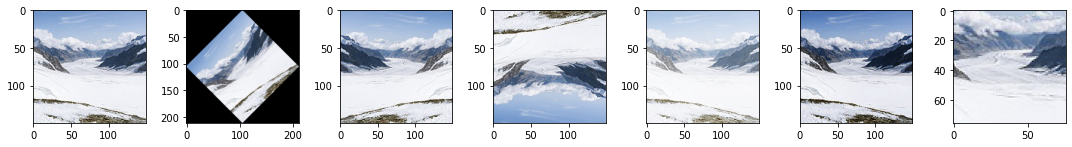





TESTING :  15130.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : forest


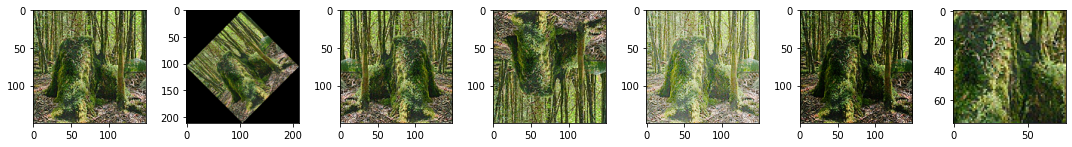





TESTING :  13073.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : street
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : street
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : street
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : street
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : street
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : street


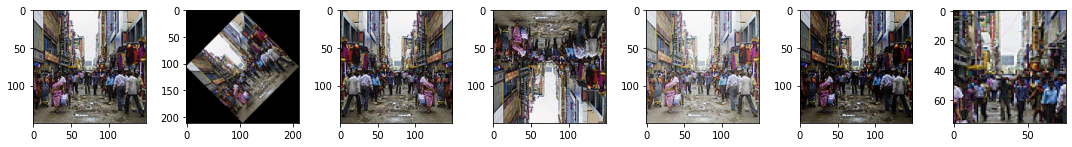





TESTING :  15014.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : forest


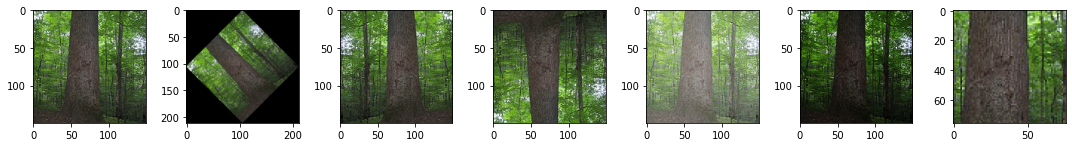





TESTING :  22359.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : glacier


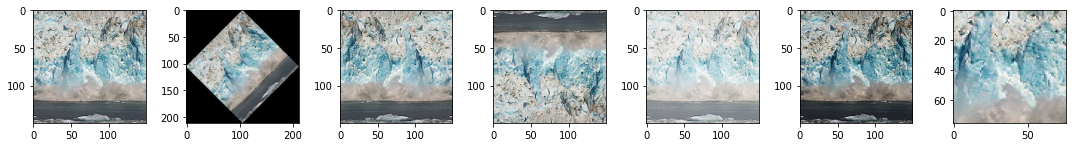





TESTING :  1931.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : sea


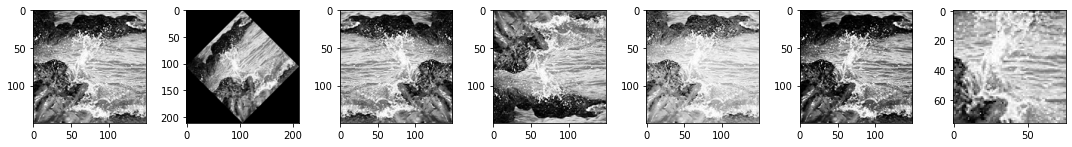





TESTING :  11752.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : forest
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : glacier


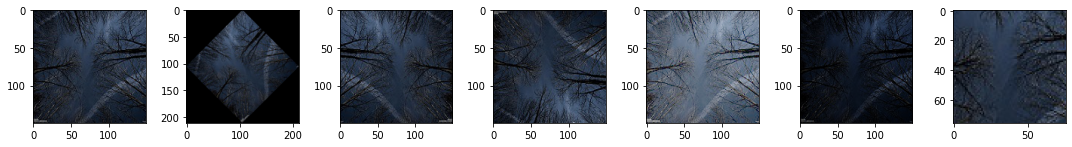





TESTING :  7867.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : glacier
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : glacier


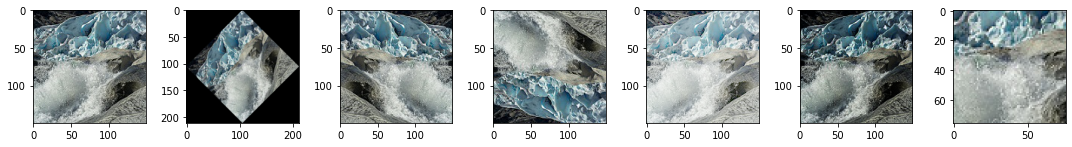





TESTING :  11357.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : sea
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : mountain


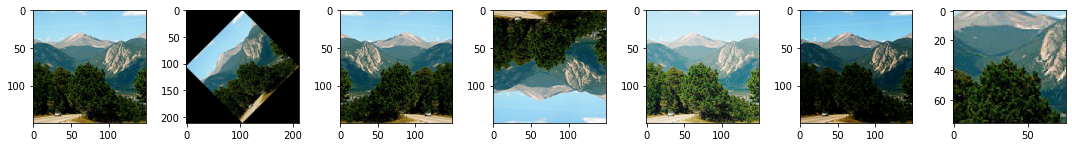





TESTING :  21178.jpg
(150, 150, 3)
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Original image : buildings
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Rotate Image : mountain
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Left Right image : buildings
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Flip Up Down Image : buildings
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Brighter Image : buildings
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Darker Image : buildings
TYPE <class 'numpy.ndarray'>
TYPE <class 'PIL.Image.Image'>
Model Prediction on Cropped Image : buildings


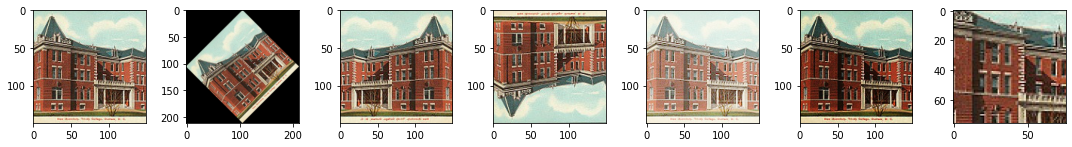

In [ ]:
# YOUR CODE HERE for predicting the labels of an image for the 6 image transformations

import os
rootdir = "Image_Transformations/testing"

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".jpg"):
            print("TESTING : ",os.path.basename(filepath))
            TestImage(filepath)